In [3]:
#	Verifying Dataset structure and contents:

import os

def verify_corresponding_files(leftImg8bit_path, gtFine_path):
    total_images = {'train': 0, 'test': 0, 'val': 0}
    found_count = {'train': 0, 'test': 0, 'val': 0}

    # Step 1: Verify files
    for split in ["train", "test", "val"]:
        print(f"\nChecking {split} folder...")
        left_split_path = os.path.join(leftImg8bit_path, split)
        gt_split_path = os.path.join(gtFine_path, split)

        for root, _, files in os.walk(left_split_path):
            for img_file in files:
                if img_file.endswith('_leftImg8bit.png'):
                    total_images[split] += 1
                    base_name = img_file.replace('_leftImg8bit.png', '')
                    city_name = os.path.basename(root)

                    gt_folder = os.path.join(gt_split_path, city_name)
                    required_files = {
                        f"{base_name}_gtFine_color.png",
                        f"{base_name}_gtFine_labelIds.png",
                        f"{base_name}_gtFine_instanceIds.png",
                        f"{base_name}_gtFine_polygons.json"
                    }

                    # Check for missing files
                    missing_files = [file for file in required_files if not os.path.exists(os.path.join(gt_folder, file))]
                    if not missing_files:
                        found_count[split] += 1

    # Step 2: Print summary
    total_count = sum(total_images.values())  # Total images in the dataset
    print("\nImage Count Summary:")
    for split in ["train", "test", "val"]:
        count = total_images[split]
        found = found_count[split]

        if total_count > 0:  # Avoid division by zero
            percentage = (count / total_count) * 100
            if found == count:
                print(f"All files are available for {split} images: {count} images ({percentage:.2f}%).")
            else:
                print(f"Checked {count} images in {split}. Found all corresponding files for {found} images ({percentage:.2f}%).")
        else:
            print(f"No images found in {split}.")

# Example usage
verify_corresponding_files(
    'C:\\Users\\deeks_w4ub1k8\\Documents\\leftImg8bit',
    'C:\\Users\\deeks_w4ub1k8\\Documents\\gtfine'
)



Checking train folder...

Checking test folder...

Checking val folder...

Image Count Summary:
All files are available for train images: 2975 images (59.50%).
All files are available for test images: 1525 images (30.50%).
All files are available for val images: 500 images (10.00%).


In [5]:
# Dimension Check :  

import os
from PIL import Image

def display_combined_image_dimensions(folder_path):
    # Check if the folder exists
    if not os.path.exists(folder_path):
        print(f"Folder does not exist: {folder_path}")
        return

    total_images = 0
    total_width = 0
    total_height = 0

    # Traverse through the folder and its subfolders
    for root, _, files in os.walk(folder_path):
        for filename in files:
            if filename.lower().endswith('.png'):  # Filter for PNG files
                img_path = os.path.join(root, filename)
                
                try:
                    with Image.open(img_path) as img:
                        width, height = img.size
                        total_width += width
                        total_height += height
                        total_images += 1
                except Exception as e:
                    print(f"Error loading {filename}: {e}")

    # Print combined dimensions of all images at once
    if total_images > 0:
        average_width = total_width // total_images
        average_height = total_height // total_images
        print(f"Total dimensions of {total_images} images in '{folder_path}': {average_width} x {average_height} pixels.")
    else:
        print("No images found.")

# Example usage for multiple folders
folders = [
    'C:\\Users\\deeks_w4ub1k8\\Documents\\leftImg8bit',
    'C:\\Users\\deeks_w4ub1k8\\Documents\\gtFine'
]

for folder in folders:
    display_combined_image_dimensions(folder)


Total dimensions of 5000 images in 'C:\Users\deeks_w4ub1k8\Documents\leftImg8bit': 2048 x 1024 pixels.
Total dimensions of 15000 images in 'C:\Users\deeks_w4ub1k8\Documents\gtFine': 2048 x 1024 pixels.


Loading images from: C:\Users\deeks_w4ub1k8\Documents\gtfine
Loading images from: C:\Users\deeks_w4ub1k8\Documents\leftImg8bit


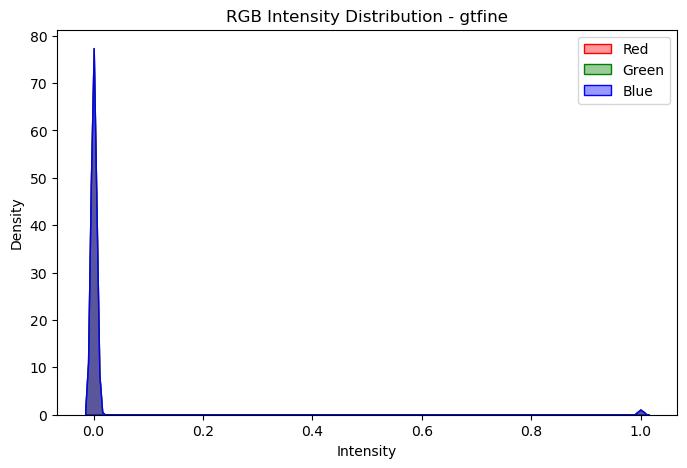

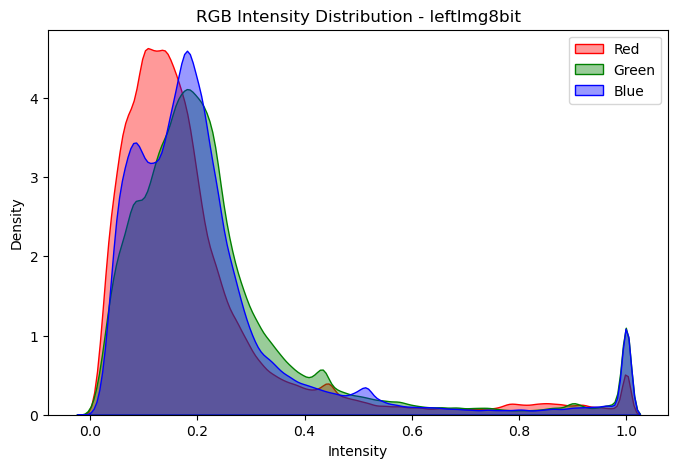

In [17]:
# RGB Intensity Distribution:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # For KDE plots
from tqdm import tqdm  # For progress bar

def load_pixels_for_rgb_analysis(folder_path, image_limit=50, resize_shape=(64, 64)):
    red_channel, green_channel, blue_channel = [], [], []

    print(f"Loading images from: {folder_path}")
    count = 0

    # Walk through subdirectories and load images
    for root, _, files in os.walk(folder_path):
        for filename in files:
            if filename.endswith(('.jpg', '.png', '.jpeg')) and count < image_limit:
                img_path = os.path.join(root, filename)RGB Intensity Distribution:
                image = cv2.imread(img_path)

                if image is None:
                    print(f"Warning: Could not read '{img_path}'. Skipping.")
                    continue

                # Resize to make it faster
                image = cv2.resize(image, resize_shape)
                image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

                # Extract RGB channels and flatten them
                red_channel.extend(image_rgb[:, :, 0].flatten())
                green_channel.extend(image_rgb[:, :, 1].flatten())
                blue_channel.extend(image_rgb[:, :, 2].flatten())

                count += 1

                if count >= image_limit:
                    break  # Stop if image limit is reached

    # Convert lists to numpy arrays for further processing
    return np.array(red_channel), np.array(green_channel), np.array(blue_channel)

def normalize_data(channel):
    """Normalize data to the range [0, 1]."""
    if len(channel) == 0:
        raise ValueError("Channel data is empty. Check if images were loaded correctly.")
    return (channel - np.min(channel)) / (np.max(channel) - np.min(channel))

# Paths to your datasets
folder1 = 'C:\\Users\\deeks_w4ub1k8\\Documents\\gtfine'
folder2 = 'C:\\Users\\deeks_w4ub1k8\\Documents\\leftImg8bit'

# Load RGB channels from both datasets
r1, g1, b1 = load_pixels_for_rgb_analysis(folder1)
r2, g2, b2 = load_pixels_for_rgb_analysis(folder2)

# Normalize channels
try:
    r1, g1, b1 = normalize_data(r1), normalize_data(g1), normalize_data(b1)
    r2, g2, b2 = normalize_data(r2), normalize_data(g2), normalize_data(b2)
except ValueError as e:
    print(e)

# Function to plot combined RGB KDE curves
def plot_combined_rgb_kde(r, g, b, folder_name):
    plt.figure(figsize=(8, 5))

    sns.kdeplot(r, color='red', label='Red', fill=True, alpha=0.4, bw_adjust=0.5)
    sns.kdeplot(g, color='green', label='Green', fill=True, alpha=0.4, bw_adjust=0.5)
    sns.kdeplot(b, color='blue', label='Blue', fill=True, alpha=0.4, bw_adjust=0.5)

    plt.title(f'RGB Intensity Distribution - {folder_name}')
    plt.xlabel('Intensity')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

# Plot RGB KDEs for both datasets
plot_combined_rgb_kde(r1, g1, b1, 'gtfine')
plot_combined_rgb_kde(r2, g2, b2, 'leftImg8bit')


In [1]:
# Quality Check of Images: 

import os
import cv2
import numpy as np

def check_image_anomalies(folders):
    total_images = 0
    corrupted_images = 0
    black_images = 0
    white_images = 0

    for folder_path in folders:
        print(f"Checking folder: {folder_path}")
        for root, dirs, files in os.walk(folder_path):
            print(f"Found {len(files)} files in {root}")  # Diagnostic message
            for filename in files:
                if not filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):  # Only process image files
                    continue
                
                # Construct full file path
                file_path = os.path.join(root, filename)
                total_images += 1
                
                try:
                    # Load the image
                    img = cv2.imread(file_path)
                    if img is None:
                        corrupted_images += 1
                        print(f"Corrupted image: {file_path}")  # Output the corrupted file path
                        continue
                    
                    # Check for black and white images
                    if np.mean(img) == 0:
                        black_images += 1
                    elif np.mean(img) == 255:
                        white_images += 1
                
                except Exception as e:
                    # Handle any exceptions (like reading errors)
                    print(f"Error reading {file_path}: {e}")
                    corrupted_images += 1

    # Calculate percentages
    corrupted_percentage = (corrupted_images / total_images) * 100 if total_images > 0 else 0
    black_percentage = (black_images / total_images) * 100 if total_images > 0 else 0
    white_percentage = (white_images / total_images) * 100 if total_images > 0 else 0

    # Print results
    print(f"\nTotal Images: {total_images}")
    print(f"Corrupted Images: {corrupted_images} ({corrupted_percentage:.2f}%)")
    print(f"Completely Black Images: {black_images} ({black_percentage:.2f}%)")
    print(f"Completely White Images: {white_images} ({white_percentage:.2f}%)")

    # Display message if there are no corrupted images
    if corrupted_images == 0:
        print("All images are good!")
    else:
        print("Some images are corrupted or have anomalies.")

# Call the function with the paths to your datasets
folders_to_check = [
    'C:\\Users\\deeks_w4ub1k8\\Documents\\gtfine',
    'C:\\Users\\deeks_w4ub1k8\\Documents\\leftImg8bit'
]
check_image_anomalies(folders_to_check)


Checking folder: C:\Users\deeks_w4ub1k8\Documents\gtfine
Found 0 files in C:\Users\deeks_w4ub1k8\Documents\gtfine
Found 0 files in C:\Users\deeks_w4ub1k8\Documents\gtfine\test
Found 2176 files in C:\Users\deeks_w4ub1k8\Documents\gtfine\test\berlin
Found 724 files in C:\Users\deeks_w4ub1k8\Documents\gtfine\test\bielefeld
Found 184 files in C:\Users\deeks_w4ub1k8\Documents\gtfine\test\bonn
Found 232 files in C:\Users\deeks_w4ub1k8\Documents\gtfine\test\leverkusen
Found 1192 files in C:\Users\deeks_w4ub1k8\Documents\gtfine\test\mainz
Found 1592 files in C:\Users\deeks_w4ub1k8\Documents\gtfine\test\munich
Found 0 files in C:\Users\deeks_w4ub1k8\Documents\gtfine\train
Found 696 files in C:\Users\deeks_w4ub1k8\Documents\gtfine\train\aachen
Found 384 files in C:\Users\deeks_w4ub1k8\Documents\gtfine\train\bochum
Found 1264 files in C:\Users\deeks_w4ub1k8\Documents\gtfine\train\bremen
Found 616 files in C:\Users\deeks_w4ub1k8\Documents\gtfine\train\cologne
Found 340 files in C:\Users\deeks_w4ub

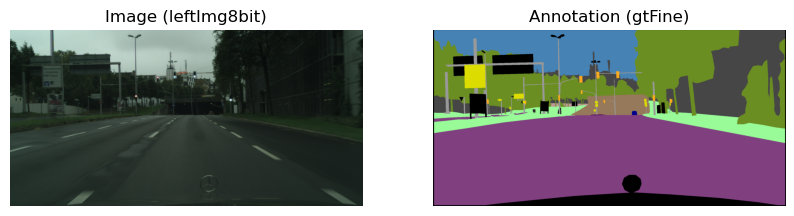

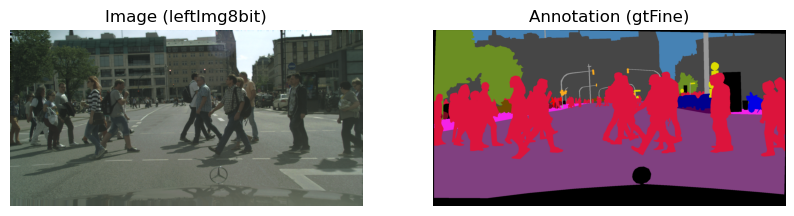

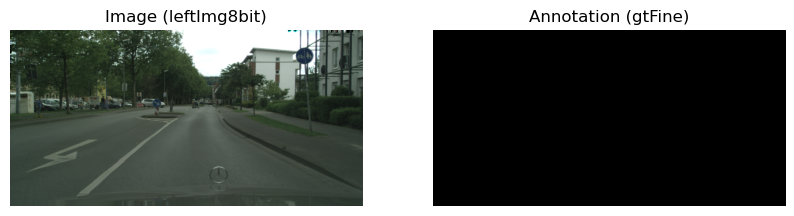

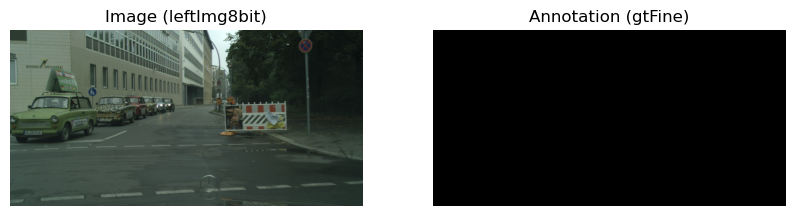

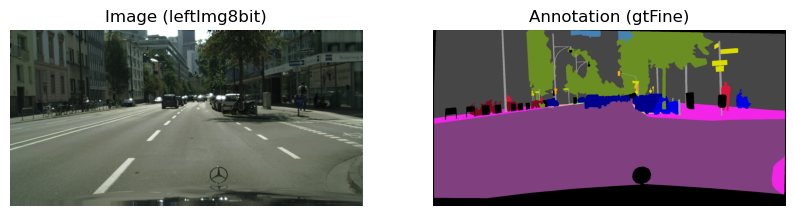

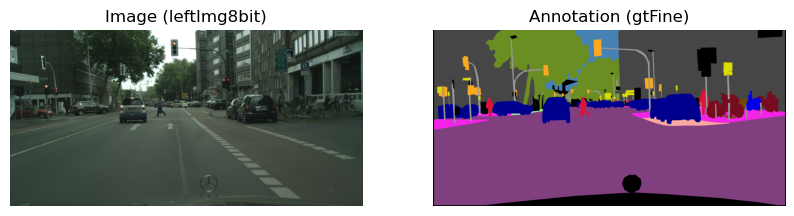

In [15]:
#Sample Data Vizualisation: 

import os
import cv2
import random
import matplotlib.pyplot as plt

def get_corresponding_annotation(img_path, leftImg_folder, gtfine_folder):
    """
    Find the corresponding annotation based on the file structure and naming.
    """
    # Replace leftImg8bit with gtfine in the path and update the filename pattern
    annotation_path = img_path.replace(leftImg_folder, gtfine_folder).replace('_leftImg8bit', '_gtFine_color')
    
    if os.path.exists(annotation_path):
        return annotation_path
    else:
        print(f"No annotation found for: {img_path}")
        return None

def display_sample_images_with_annotations(leftImg_folder, gtfine_folder, sample_size=2):
    """
    Randomly selects and displays images along with their corresponding annotations.
    """
    # Iterate through the subfolders (train, test, val)
    for split in ['train', 'test', 'val']:
        leftImg_split_path = os.path.join(leftImg_folder, split)
        images = []

        # Collect all images in the current split folder
        for root, _, files in os.walk(leftImg_split_path):
            images.extend([os.path.join(root, f) for f in files if f.endswith(('.jpg', '.png', '.jpeg'))])

        # Randomly sample a few images
        sampled_images = random.sample(images, min(sample_size, len(images)))

        # Display the sampled images and their annotations side-by-side
        for img_path in sampled_images:
            annotation_path = get_corresponding_annotation(img_path, leftImg_folder, gtfine_folder)

            if annotation_path:
                # Load the image and annotation
                img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
                annotation = cv2.cvtColor(cv2.imread(annotation_path), cv2.COLOR_BGR2RGB)

                # Plot side-by-side
                fig, axes = plt.subplots(1, 2, figsize=(10, 5))
                axes[0].imshow(img)
                axes[0].set_title('Image (leftImg8bit)')
                axes[0].axis('off')

                axes[1].imshow(annotation)
                axes[1].set_title('Annotation (gtFine)')
                axes[1].axis('off')

                plt.show()

# Specify the folders
leftImg_folder = 'C:\\Users\\deeks_w4ub1k8\\Documents\\leftImg8bit'
gtfine_folder = 'C:\\Users\\deeks_w4ub1k8\\Documents\\gtfine'

# Display images and their annotations
display_sample_images_with_annotations(leftImg_folder, gtfine_folder, sample_size=2)
